In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df=pd.read_csv("dataset_group.csv")

In [3]:
df.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [4]:
print("Shape of the Data is",df.shape)
print("Number of Rows=",df.shape[0])
print("Number of Calumns=",df.shape[1])

Shape of the Data is (20641, 3)
Number of Rows= 20641
Number of Calumns= 3


In [5]:
df.nunique()

Date         603
Order_id    1139
Product       37
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [8]:
print("Total Number of Duplicates are", df.duplicated().sum())

Total Number of Duplicates are 4730


In [9]:
df.isna().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [10]:
df['Product'] = df['Product'].str.lower()

In [11]:
df

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose
...,...,...,...
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent


In [12]:
df = df.drop(df[df.Product == 'none'].index)

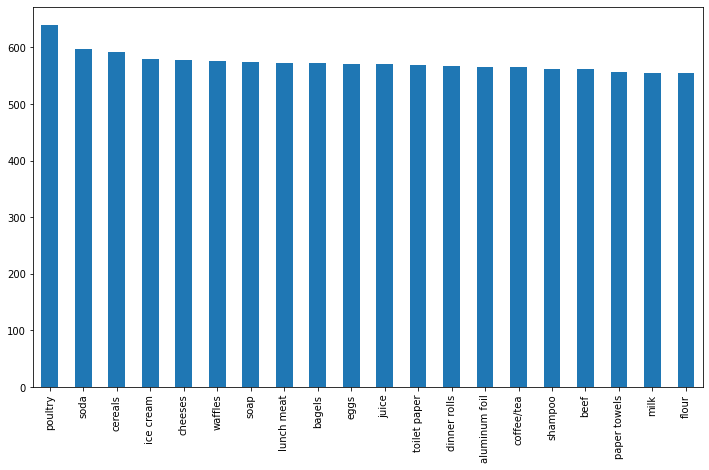

In [14]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [15]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [16]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,eggs,flour,fruits,hand soap,ice cream,individual meals,juice,ketchup,laundry detergent,lunch meat,milk,mixes,paper towels,pasta,pork,poultry,sandwich bags,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [17]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [18]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket=basket.applymap(encode_zero_one)

In [19]:
from mlxtend.frequent_patterns import apriori

In [20]:
item = apriori(basket, min_support = 0.01, use_colnames = True)

In [21]:
item

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(soda, mixes, sandwich bags, pork, soap, spagh..."
610568,0.011414,"(soda, mixes, sandwich bags, soap, spaghetti s..."
610569,0.010536,"(sandwich loaves, shampoo, soda, lunch meat, l..."
610570,0.011414,"(shampoo, yogurt, mixes, sandwich bags, lunch ..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


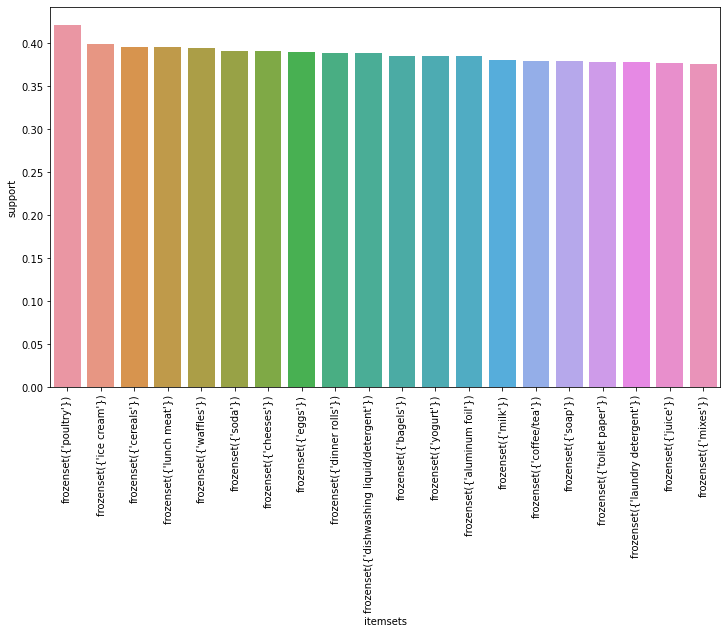

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(item.sort_values('support',ascending=False).iloc[0:20,1],
            item.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [23]:
from mlxtend.frequent_patterns import association_rules

basket=association_rules(item, metric="confidence", min_threshold=0.7)
basket

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(all- purpose, flour, butter, beef)",(aluminum foil),0.021949,0.384548,0.015803,0.720000,1.872329,0.007363,2.198043
1,"(aluminum foil, all- purpose, fruits, cereals)",(beef),0.026339,0.374890,0.018437,0.700000,1.867213,0.008563,2.083699
2,"(waffles, all- purpose, milk, beef)",(aluminum foil),0.023705,0.384548,0.017559,0.740741,1.926264,0.008444,2.373887
3,"(aluminum foil, all- purpose, butter, cereals)",(laundry detergent),0.026339,0.378402,0.018437,0.700000,1.849884,0.008471,2.071993
4,"(aluminum foil, cheeses, butter, all- purpose)",(laundry detergent),0.024583,0.378402,0.017559,0.714286,1.887637,0.008257,2.175593
...,...,...,...,...,...,...,...,...,...
176192,"(shampoo, yogurt, mixes, sandwich bags, milk, ...",(lunch meat),0.014047,0.395083,0.010536,0.750000,1.898333,0.004986,2.419666
176193,"(shampoo, yogurt, mixes, lunch meat, milk, tor...",(sandwich bags),0.013169,0.367867,0.010536,0.800000,2.174702,0.005691,3.160667
176194,"(shampoo, yogurt, sandwich bags, lunch meat, m...",(mixes),0.014047,0.375768,0.010536,0.750000,1.995911,0.005257,2.496927
176195,"(shampoo, mixes, sandwich bags, lunch meat, mi...",(yogurt),0.010536,0.384548,0.010536,1.000000,2.600457,0.006484,inf


In [25]:
# determining the name of the file
file_name = 'basket.xlsx'
  
# saving the excel
basket.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
